In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


### **Dataset**

In [2]:
# Dataset path
data_path = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/loan_data.csv'
credit_df = pd.read_csv(data_path, sep = ';')
credit_df

,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,RES,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,1,0.0,V,37764.0,U,0.0,0.0,0.0,340.0,0.0,0.0,0.0
1221,56.0,3.0,0.0,1,1200.0,P,31500.0,O,6928.0,46464.0,784.0,256.0,0.0,0.0,1.0
1222,60.0,0.0,0.0,1,0.0,E,46800.0,O,11392.0,928.0,1144.0,680.0,0.0,108.0,0.0
1223,20.0,0.0,0.0,1,0.0,R,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**What's inside the dataset:**<br>

- **YOB** - Year of Birth
- **nKIDS** - Number of Kids
- **nDEP** - Number of Other Dependents
- **PHON** - Whether Has a House Phone
- **dINC_SP** - Income of Spouse
- **EMPS_A** - Applicant's Employment Status
- **dINAC_A** - Applicant's Income
- **RES** - Applicant's Residential Status
- **dHVAL** - Value of Home
- **dMBO** - Mortgage Balance Outstanding
- **dOUTM** - Outgoings on Mortgage or Rent
- **dOUTL** - Outgoings on Loans
- **dOUTH** - Outgoings on Hire Purchase
- **dOUTCC** - Outgoings on Credit Cards
- **BAD** - Good\Bad Credit Indicator

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YOB      1225 non-null   float64
 1   nKIDS    1225 non-null   float64
 2   nDEP     1225 non-null   float64
 3   PHON     1225 non-null   int64  
 4   dINC_SP  1225 non-null   float64
 5   EMPS_A   1225 non-null   object 
 6   dINC_A   1225 non-null   float64
 7   RES      1225 non-null   object 
 8   dHVAL    1225 non-null   float64
 9   dMBO     1225 non-null   float64
 10  dOUTM    1225 non-null   float64
 11  dOUTL    1225 non-null   float64
 12  dOUTHP   1225 non-null   float64
 13  dOUTCC   1225 non-null   float64
 14  BAD      1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB


In [4]:
credit_df.nunique()

YOB         65
nKIDS        6
nDEP         3
PHON         2
dINC_SP    151
EMPS_A      11
dINC_A     394
RES          5
dHVAL      111
dMBO       132
dOUTM      215
dOUTL      131
dOUTHP      75
dOUTCC      47
BAD          2
dtype: int64

In [5]:
# Data type handling

# Binary variables to uint8
bool_col = [col for col in credit_df.columns if credit_df[col].nunique()==2]
credit_df[bool_col] = credit_df[bool_col].astype('uint8')

# Float64 to float32
float_cols = [col for col in credit_df.columns if credit_df[col].dtype=='float64']
credit_df[float_cols] = credit_df[float_cols].astype('float32')

# Objects to category
cat_cols = [col for col in credit_df.columns if credit_df[col].dtype=='object']
credit_df[cat_cols] = credit_df[cat_cols].astype('category')

for col in credit_df.columns:
    print(f'{col}: {credit_df[col].dtype}')

YOB: float32
nKIDS: float32
nDEP: float32
PHON: uint8
dINC_SP: float32
EMPS_A: category
dINC_A: float32
RES: category
dHVAL: float32
dMBO: float32
dOUTM: float32
dOUTL: float32
dOUTHP: float32
dOUTCC: float32
BAD: uint8


In [6]:
credit_df.describe()

,YOB,nKIDS,nDEP,PHON,dINC_SP,dINC_A,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,51.037552,0.623673,0.038367,0.903673,1990.084839,21244.212891,15693.858398,11225.691406,342.004883,121.926529,28.721632,39.595100,0.263673
std,15.301818,1.016013,0.219917,0.295159,4802.341309,15896.208008,20736.332031,18889.207031,427.993866,839.639587,119.324081,168.697098,0.440804
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,19500.000000,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,1.000000,1040.000000,30600.000000,28928.000000,20000.000000,528.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,5.000000,2.000000,1.000000,50000.000000,64800.000000,64928.000000,64000.000000,3800.000000,28000.000000,1600.000000,2800.000000,1.000000


In [7]:
len(float_cols)

11

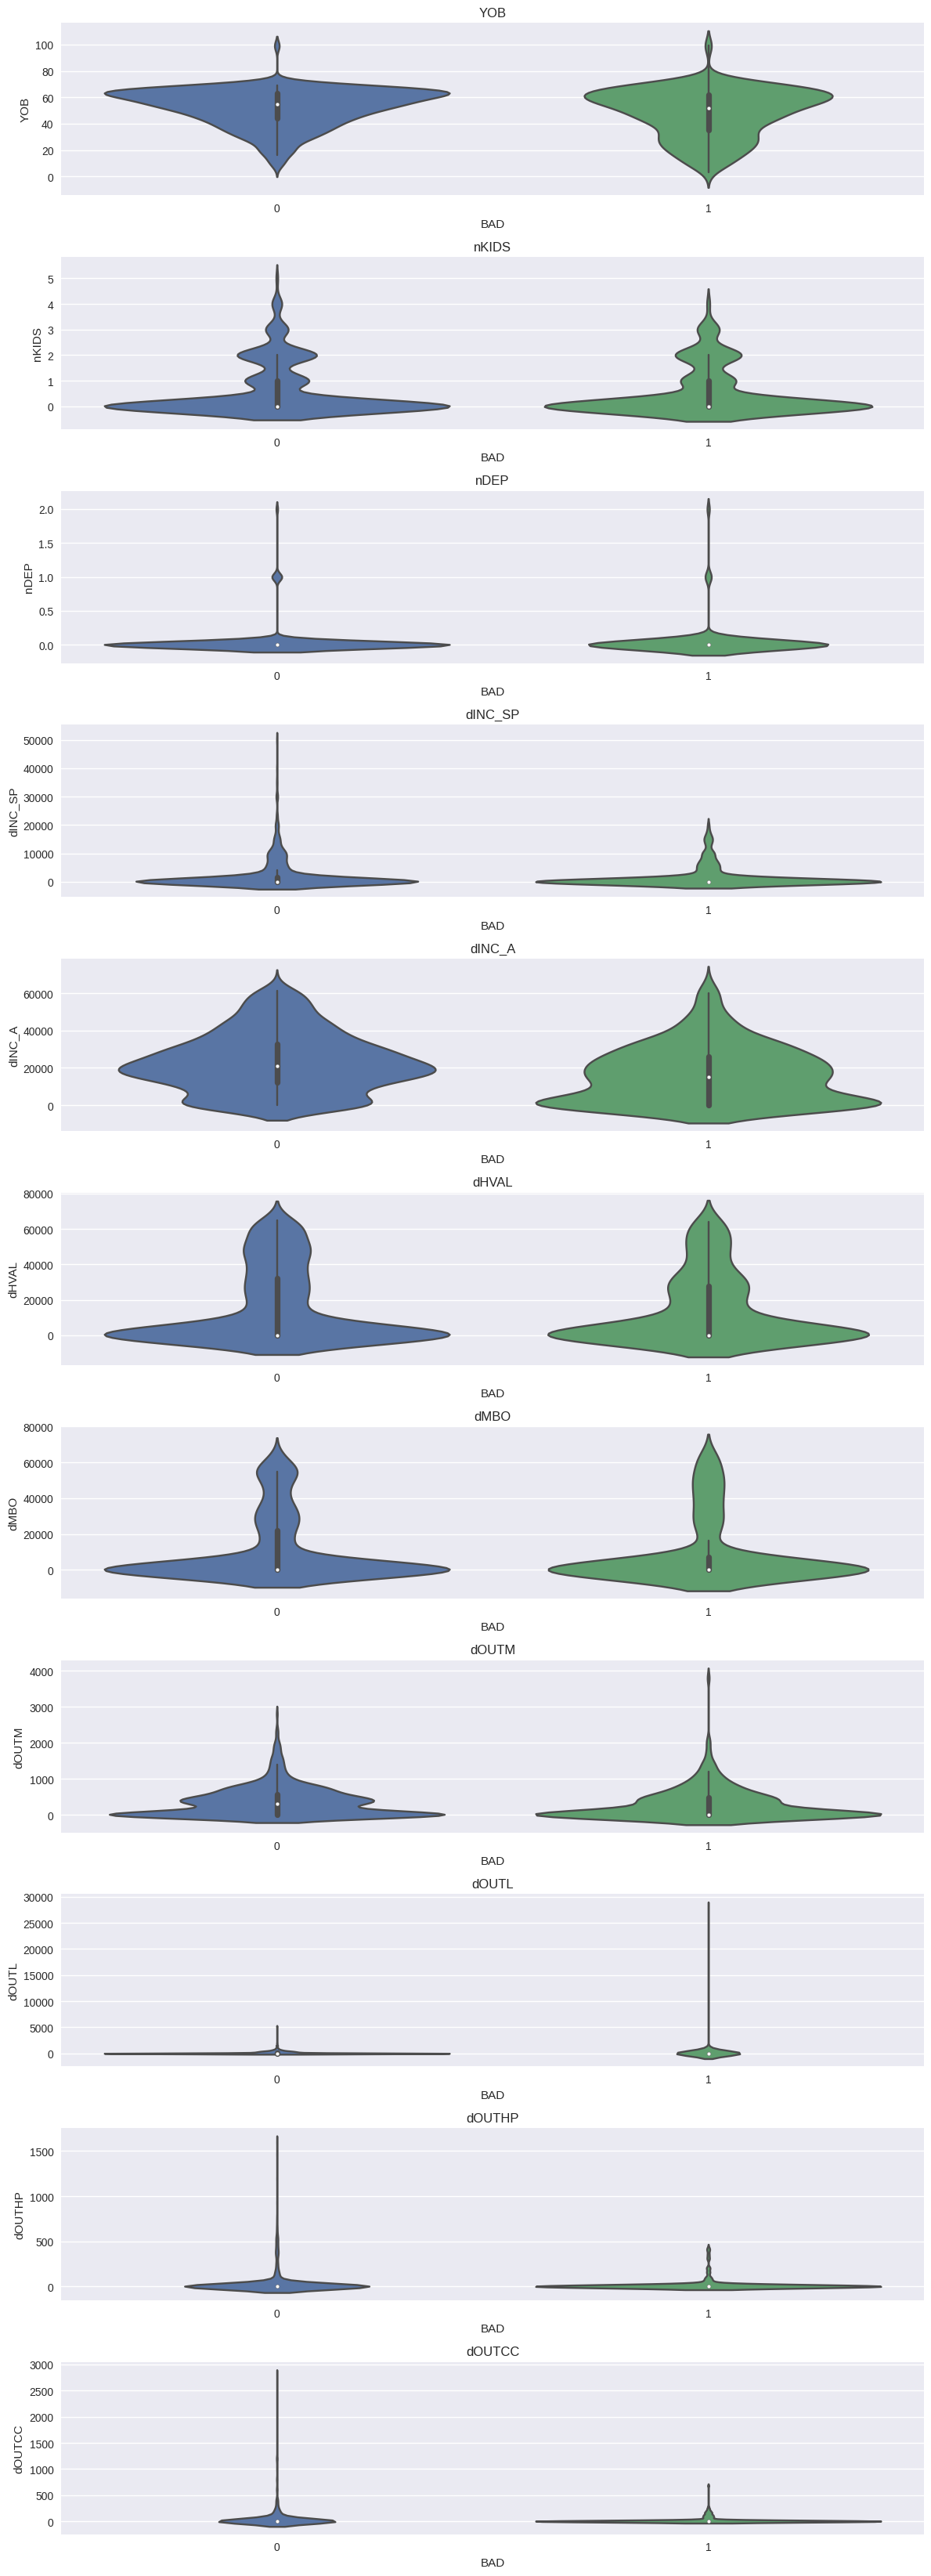

In [8]:
fig, axs = plt.subplots(
    nrows=len(float_cols),
    figsize=(12, 3*len(float_cols))
)

for ax, feature in zip(axs, float_cols):
    sns.violinplot(
        data=credit_df,
        x='BAD',
        y=feature,
        ax=ax
    )
    ax.set_title(feature)

plt.tight_layout()
plt.show()
plt.close()

### **Feature Encoding, Selection**
To continue further, the dataset will be splitted into a training and testing set. Encoding and feature selection decisions will be based on the characteristics of the training set and applied to the test set. 

In [9]:
# 0.8-0.2 Train-Test Split
train, test = train_test_split(credit_df,
                               test_size=0.2,
                               random_state=66)

In [10]:
# Inspect categorical features from train set to decide on encoding
for item in cat_cols:
    print(f'{train[item].value_counts()}\n')

P    418
V    179
E    103
T    100
R     86
W     34
B     27
M     15
U      7
Z      7
N      4
Name: EMPS_A, dtype: int64

O    495
P    204
U    121
F    107
N     53
Name: RES, dtype: int64



`RES` can simply be encoded as dummy variables. For `EMPS_A` grouping can be tried to avoid high dimensionality.

In [11]:
# Get dummies for RES
train = pd.get_dummies(
    train,
    columns=['RES'],
    drop_first=True
    )
test = pd.get_dummies(
    test,
    columns=['RES'],
    drop_first=True)

Below is a class that handles optimizing for best grouping among the `EMPS_A`. The grouping is reduced iteratively based on minimum difference in Good/Bad indicator ratio per category levels. Each grouping is evaluated using the $\chi^2$ test. 

The class allows for making an elbow plot of $\chi^2$ test statistics and p-values, printing p-values of all groupings and directly calling the best grouping. 

The class is an extension upon a optimization function demonstrated by Prof. Dr. Stefan Lessmann of HU Berlin. 

In [12]:
# Class to optimize grouping using X^2 test

class CategoryOptimizer:

    def __init__(self, categorical_feature, target_feature):
        self.categorical_feature = categorical_feature
        self.target_feature = target_feature

        self.category_amount = [self.categorical_feature.nunique()]
        self.categories = [self.categorical_feature.cat.categories]
        # Some empty containers as callable self arguments
        self.test_statistics = []
        self.p_values = []
        # Optimize method automatically
        self._optimize()

    
    def _optimize(self):
        '''
        Computes crosstab of the categorical feature and target feature. 
        Computes Good/Bad odds ratio differentials and optimizes grouping based on minimum differences in ratio.
        Best grouping selected using X^2 test.
        '''

        # First do the X^2 on unmerged data and append to containers
        cross_tab = pd.crosstab(self.categorical_feature, self.target_feature)
        stat, p_val, _, _ = stats.chi2_contingency(cross_tab)
        self.test_statistics.append(stat)
        self.p_values.append(p_val)

        # Begin iterative grouping
        while self.category_amount[-1] > 1:
            cross_tab = pd.crosstab(self.categorical_feature, self.target_feature)
            # Get odds ratio
            cross_tab['odds'] = cross_tab[0] / cross_tab[1]
            # Sort
            cross_tab.sort_values('odds', inplace=True)
            # Calculate differences in odds between neighboring categories
            cross_tab['diff'] = cross_tab['odds'].diff()
            # Find where difference in odds minimum
            minimum_index = np.where(cross_tab['diff']==cross_tab['diff'].min())[0][0]
            # Identify levels to merge
            levels_to_merge = cross_tab[(minimum_index-1):(minimum_index+1)].index.values
            # Generate New Level Name
            new_level = '+'.join(levels_to_merge)
            # Add New Level as Category
            self.categorical_feature = self.categorical_feature.cat.add_categories(new_level)
            # Assign Data to New Level
            for l in levels_to_merge:
                self.categorical_feature[self.categorical_feature == l] = new_level
            # Remove old levels
            self.categorical_feature = self.categorical_feature.cat.remove_categories(levels_to_merge)
            # Append to category amount and categories lists
            self.category_amount.append(self.categorical_feature.nunique())
            self.categories.append(self.categorical_feature.cat.categories)
            #Chi^2 for Merged Category and append to containers
            cross_tab = pd.crosstab(self.categorical_feature, self.target_feature)
            stat, p_val, _, _ = stats.chi2_contingency(cross_tab)
            self.test_statistics.append(stat)
            self.p_values.append(p_val)
    
    def elbow_plot(self):
        '''
        Makes an elbow plot for the chi^2 tests conducted per iteration
        '''
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 1, 1)
        ax1.set_title('Elbow Cruve for $\chi^2$')
        ax1.plot(self.category_amount, self.test_statistics, '#1f77b4')
        ax1.set_xlabel('No. of Categories')
        ax1.set_ylabel('$\chi^2$ test statistic', color='#1f77b4' )

        ax2 = ax1.twinx()
        ax2.plot(self.category_amount, self.p_values, '#d62728')
        ax2.set_ylabel('$\chi^2$ p-value', color='#d62728')
        ax2.set_ylim(0, 1e-7)

        plt.show()

    
    def print_results(self):
        '''
        Prints all considered merging options and corresponding chi^2 p-values
        '''
        for i in range(len(self.categories)):
            print(f'{self.category_amount[i]} Categories: {self.categories[i].values}\n'
                  f'Chi-square p-value: {self.p_values[i]}')
            print('-'*80)


    def get_best_grouping(self):
        '''
        Prints only the best grouping option
        '''
        minimum_p_val_index = self.p_values.index(min(self.p_values))

        print(f'{self.category_amount[minimum_p_val_index]} Categories: {self.categories[minimum_p_val_index].values}\n'
              f'Chi-square p-value: {self.p_values[minimum_p_val_index]}')

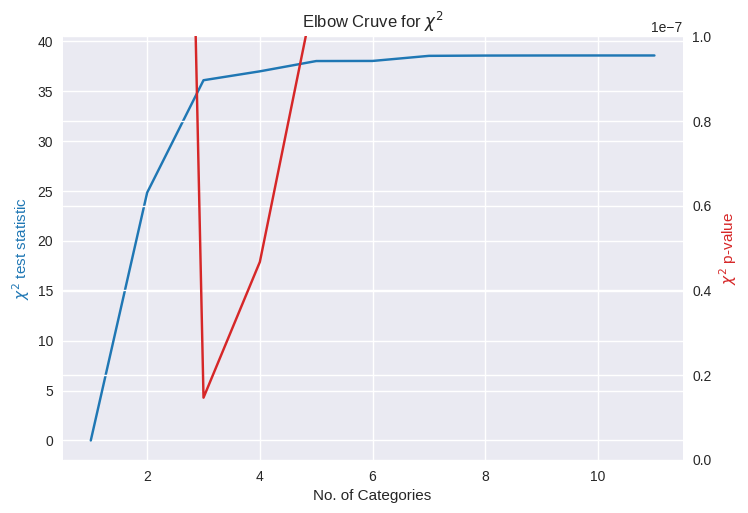

In [13]:
# Optimize for train set only
optimizer = CategoryOptimizer(categorical_feature=train['EMPS_A'], target_feature=train['BAD'])
# Generate plot
optimizer.elbow_plot()

In [14]:
# Print all results
optimizer.print_results()

11 Categories: ['B' 'E' 'M' 'N' 'P' 'R' 'T' 'U' 'V' 'W' 'Z']
Chi-square p-value: 3.0358127032533333e-05
--------------------------------------------------------------------------------
10 Categories: ['B' 'E' 'M' 'N' 'P' 'R' 'T' 'V' 'W' 'U+Z']
Chi-square p-value: 1.3849448653898703e-05
--------------------------------------------------------------------------------
9 Categories: ['M' 'N' 'P' 'R' 'T' 'V' 'W' 'U+Z' 'E+B']
Chi-square p-value: 5.946766406210697e-06
--------------------------------------------------------------------------------
8 Categories: ['N' 'P' 'R' 'T' 'V' 'U+Z' 'E+B' 'W+M']
Chi-square p-value: 2.384973285807943e-06
--------------------------------------------------------------------------------
7 Categories: ['N' 'P' 'R' 'V' 'U+Z' 'W+M' 'T+E+B']
Chi-square p-value: 8.895792056782403e-07
--------------------------------------------------------------------------------
6 Categories: ['N' 'P' 'V' 'U+Z' 'T+E+B' 'R+W+M']
Chi-square p-value: 3.7586039500444256e-07
--------

In [15]:
# Get best grouping
optimizer.get_best_grouping()

3 Categories: ['T+E+B' 'U+Z+R+W+M' 'N+P+V']
Chi-square p-value: 1.4655105467616964e-08


In [16]:
train.EMPS_A.cat.categories

Index(['B', 'E', 'M', 'N', 'P', 'R', 'T', 'U', 'V', 'W', 'Z'], dtype='object')

In [17]:
# conversion map
conversion_map= {
    'B': 'T+E+B',
    'E': 'T+E+B',
    'M': 'U+Z+R+W+M',
    'N': 'N+P+V',
    'P': 'N+P+V',
    'R': 'U+Z+R+W+M',
    'T': 'T+E+B',
    'U': 'U+Z+R+W+M',
    'V': 'N+P+V',
    'W': 'U+Z+R+W+M',
    'Z': 'U+Z+R+W+M',
}

# Map EMPS_A in both sets based on optimal grouping determined from train set
train['EMPS_A'] = train['EMPS_A'].map(conversion_map)
test['EMPS_A'] = test['EMPS_A'].map(conversion_map)

# Generate Dummies
train = pd.get_dummies(
    train,
    columns=['EMPS_A'],
    drop_first=True
    )
test = pd.get_dummies(
    test,
    columns=['EMPS_A'],
    drop_first=True)

T-test will be tried for feature selection among the continuous features.

In [18]:
def t_tester(data, y, x):
    '''
    Function goes through each continuous feature to determine whether sample variances
    are equal when grouped by the target using Levene test. After that t-test or Welch t-test are used.  
    '''
    significant_features = []
    for item in x:
        # Conduct Levene test
        levene_result = stats.levene(data.loc[data[y]==0][item],
                                     data.loc[data[y]==1][item])
        # Check if p-value below 0.05
        if levene_result[1] < 0.05:
            # Conduct welch t-test
            t_result = stats.ttest_ind(data.loc[data[y]==0][item],
                                     data.loc[data[y]==1][item],
                                     equal_var=False)
        else:
            # Conduct t-test with assumption of equal variances
            t_result = stats.ttest_ind(data.loc[data[y]==0][item],
                                     data.loc[data[y]==1][item],
                                     equal_var=True)
        print(f'Testing Results for {item}:\n'
              f'T-test - Test statistic: {t_result[0]:.4f}, p-value: {t_result[1]:.4f}')
        print('='*80)
        
        if t_result[1] < 0.05:
            significant_features.append(item)
        
    return significant_features


In [19]:
significant_features = t_tester(data=train,
         y='BAD',
         x=float_cols)

print(significant_features)

Testing Results for YOB:
T-test - Test statistic: 2.3210, p-value: 0.0208
Testing Results for nKIDS:
T-test - Test statistic: 1.5070, p-value: 0.1321
Testing Results for nDEP:
T-test - Test statistic: -0.6893, p-value: 0.4908
Testing Results for dINC_SP:
T-test - Test statistic: 2.6719, p-value: 0.0077
Testing Results for dINC_A:
T-test - Test statistic: 5.9950, p-value: 0.0000
Testing Results for dHVAL:
T-test - Test statistic: 1.7641, p-value: 0.0780
Testing Results for dMBO:
T-test - Test statistic: 1.5710, p-value: 0.1165
Testing Results for dOUTM:
T-test - Test statistic: 2.0824, p-value: 0.0376
Testing Results for dOUTL:
T-test - Test statistic: -1.3107, p-value: 0.1903
Testing Results for dOUTHP:
T-test - Test statistic: 1.6648, p-value: 0.0963
Testing Results for dOUTCC:
T-test - Test statistic: 5.1123, p-value: 0.0000
['YOB', 'dINC_SP', 'dINC_A', 'dOUTM', 'dOUTCC']


The processed dataset can now be saved as two separate train and test sets, large sets, that include all features and small sets, that include only those continuous features that rejected the $H_0$ of the t-test. Model selection can be conducted on the two separate sets possibly yielding interesting insight. 

But before that, one last thing to do is inspect the distribution of the target (which is imbalanced) and conduct upsampling on the training set. 

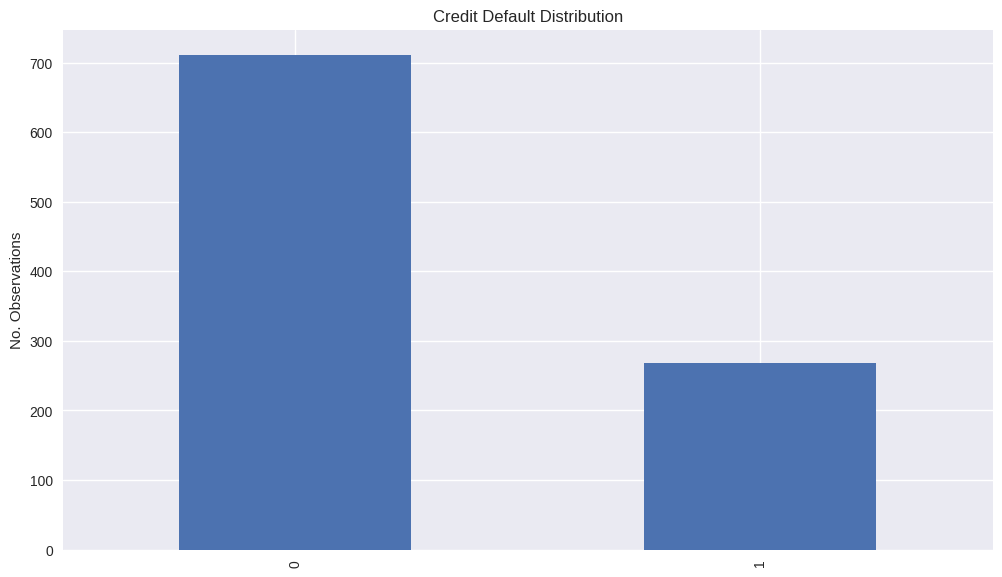

In [21]:
plt.figure(figsize=(12,6.75))
train['BAD'].value_counts().plot(kind='bar')
plt.title('Credit Default Distribution')
plt.ylabel('No. Observations')
plt.show()
plt.close()

In [24]:
# Can also inspect imbalance ratio
imabalance_ratio = train['BAD'].value_counts(normalize=True)
imabalance_ratio

0    0.726531
1    0.273469
Name: BAD, dtype: float64


Synthetic upsampling can be used to resolve the imbalance in the training set as demonstrated below:

In [25]:
# Separate target and predictors
X_train = train.drop('BAD', axis=1)
y_train = train['BAD']

# Initilize smote
smote = SMOTE(sampling_strategy='auto',
              random_state=66)
# Resample
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Concatenate
train_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)
# Check
new_imbalance = train_resampled['BAD'].value_counts(normalize=True)
new_imbalance

0    0.5
1    0.5
Name: BAD, dtype: float64

In [28]:
# Overwrite train set
train = train_resampled.copy()

Now we can proceed with generating the two datasets, one with feature selection based on t-tests and one without.

In [30]:
small_set_cols = [col for col in train.columns if (train[col].dtype != 'float32') or (train[col].dtype == 'float32' and col in significant_features)]

train_small = train[small_set_cols].copy()
test_small = test[small_set_cols].copy()

In [31]:
with open('train.pkl', 'wb') as f:
    pickle.dump(train, f)
with open('test.pkl', 'wb') as f:
    pickle.dump(test, f)
with open('train_small.pkl', 'wb') as f:
    pickle.dump(train_small, f)
with open('test_small.pkl', 'wb') as f:
    pickle.dump(test_small, f)